# EDA Of Swiggy Sales Data

#### 1. Load and Inspect Data – Read the dataset into a Pandas DataFrame and check for missing values, data types, and basic statistics. 

In [57]:
import pandas as pd
import matplotlib.pylab as plt 

df=pd.read_csv("swiggy.csv")

##### Check Missing Values in dataset

In [58]:
x=df.isnull().any()
print(x)
# there is no null value in a dataset 

ID               False
Area             False
City             False
Restaurant       False
Price            False
Avg ratings      False
Total ratings    False
Food type        False
Address          False
Delivery time    False
dtype: bool


##### Check Data Type 

In [59]:
y=df.dtypes
print(y)

ID                 int64
Area              object
City              object
Restaurant        object
Price              int64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object


##### Basic Statistics

In [60]:
print(df.describe())

                  ID        Price  Avg ratings  Total ratings  Delivery time
count    8680.000000  8680.000000  8680.000000    8680.000000    8680.000000
mean   244812.071429   348.444470     3.655104     156.634793      53.967051
std    158671.617188   230.940074     0.647629     391.448014      14.292335
min       211.000000     0.000000     2.000000      20.000000      20.000000
25%     72664.000000   200.000000     2.900000      50.000000      44.000000
50%    283442.000000   300.000000     3.900000      80.000000      53.000000
75%    393425.250000   400.000000     4.200000     100.000000      64.000000
max    466928.000000  2500.000000     5.000000   10000.000000     109.000000


#### 2. Summary Statistics – Generate summary statistics for Price, Avg ratings, and Total ratings.

In [61]:
z=df[["Price","Avg ratings","Total ratings"]]
print(z.describe())

             Price  Avg ratings  Total ratings
count  8680.000000  8680.000000    8680.000000
mean    348.444470     3.655104     156.634793
std     230.940074     0.647629     391.448014
min       0.000000     2.000000      20.000000
25%     200.000000     2.900000      50.000000
50%     300.000000     3.900000      80.000000
75%     400.000000     4.200000     100.000000
max    2500.000000     5.000000   10000.000000


#### 3.Handle Missing Values – Identify and fill or remove missing values if any. 

#####   We already check missing values , so there is no any missing value

#### 4. Convert Data Types – Ensure numerical columns (Price, Avg ratings, Total ratings) are in the correct format.

In [62]:
df["Price"].astype(int)
df["Avg ratings"].astype(float)
df["Total ratings"].astype(int)


0       100
1       100
2       100
3       500
4        50
       ... 
8675     80
8676     80
8677     80
8678     80
8679     80
Name: Total ratings, Length: 8680, dtype: int32

#### 5. Standardize Column Names – Convert column names to lowercase and replace spaces with underscores.

In [63]:
df.columns=df.columns.str.lower().str.replace(" ","_")
print(df)

          id                    area       city                restaurant  \
0        211             Koramangala  Bangalore               Tandoor Hut   
1        221             Koramangala  Bangalore             Tunday Kababi   
2        246               Jogupalya  Bangalore                   Kim Lee   
3        248             Indiranagar  Bangalore         New Punjabi Hotel   
4        249             Indiranagar  Bangalore                       Nh8   
...      ...                     ...        ...                       ...   
8675  464626  Panjarapole Cross Road  Ahmedabad                Malt Pizza   
8676  465835                  Rohini      Delhi  Jay Mata Ji Home Kitchen   
8677  465872                  Rohini      Delhi      Chinese Kitchen King   
8678  465990                  Rohini      Delhi    Shree Ram Paratha Wala   
8679  466488             Navrangpura  Ahmedabad              Sassy Street   

      price  avg_ratings  total_ratings  \
0       300          4.4        

#### 6. Top 5 Expensive Restaurants – Find the five most expensive restaurants based on Price.

In [64]:
sorted_price=df.sort_values(by="price",ascending=False).head(5)
print(sorted_price[["restaurant","price"]])

                                restaurant  price
3079            Malgudi - The Savera Hotel   2500
2934           Itc Windsor - Gourmet Couch   2500
4718  Origami Japanese & Korean Restaurant   2500
1377                    Cafe Delhi Heights   2000
8485     Lubov Patisserie By Frozen Bottle   2000


#### 7. Top Rated Restaurants – List restaurants with an Avg ratings of 4.5 and above.

In [65]:
top_rating=df[df["avg_ratings"]>=4.5].sort_values(by="avg_ratings",ascending=False)
print(top_rating[["restaurant","avg_ratings"]])

              restaurant  avg_ratings
8571              Afresh          5.0
5519         Cafe Kokomo          5.0
5425  The Asian Pavilion          5.0
5424     Get In My Belly          5.0
5684           Papacream          5.0
...                  ...          ...
3306        Rocket Momos          4.5
3293    Cafe Coffee Hutt          4.5
3291  That Waffle Place!          4.5
3268  New Famous Chinese          4.5
4386     Pimlico Kothrud          4.5

[662 rows x 2 columns]


#### 8. Average Price by Food Type – Calculate the average price of different Food type categories.

In [66]:
avg_by_food=df.groupby("food_type")["price"].mean()
print(avg_by_food)

food_type
Afghani,Arabian,Indian,Tandoor                            850.000000
Afghani,Biryani                                           400.000000
Afghani,Mughlai                                           300.000000
American                                                  405.714286
American  Beverages  Fast Food                            350.000000
                                                            ...     
Tibetan,Lebanese,Fast Food,Tandoor                        200.000000
Tribal,Seafood,Chinese                                   1200.000000
Turkish                                                   883.333333
Turkish,Arabian                                           300.000000
Turkish,Mediterranean,Middle Eastern,Lebanese,Arabian    1500.000000
Name: price, Length: 3734, dtype: float64


#### 9. Most Popular Cities – Find which cities have the most restaurants. 

In [67]:
most_rest=df.groupby("city")["restaurant"].count()
print(most_rest)

city
Ahmedabad     717
Bangalore     946
Chennai      1106
Delhi         611
Hyderabad    1075
Kolkata      1346
Mumbai       1277
Pune         1090
Surat         512
Name: restaurant, dtype: int64


#### 10. Fastest Delivery Restaurant – Identify the restaurant with the least Delivery time.

In [68]:
fast_delivery_time=df.loc[df["delivery_time"].idxmin(),["restaurant","delivery_time"]]
print(fast_delivery_time)

restaurant       Scoops
delivery_time        20
Name: 6506, dtype: object


## Visualization  


In [69]:
import matplotlib.pylab as plt 
import seaborn as sns

#### 1. Price Distribution – Create a histogram or box plot of Price. 

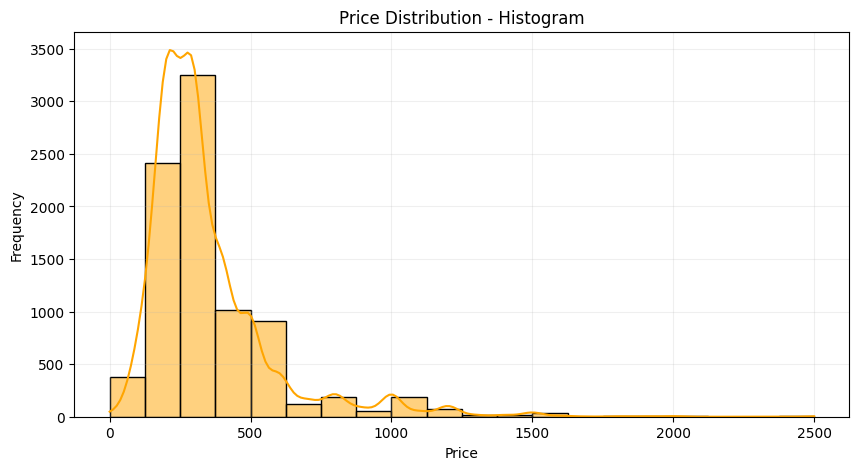

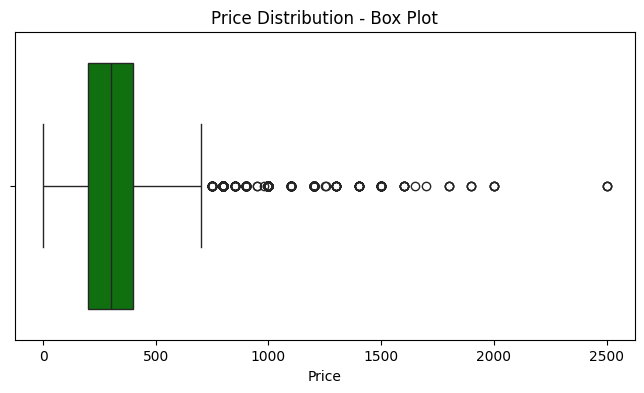

In [70]:
# create a histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=20, kde=True, color='orange')
plt.title('Price Distribution - Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.show()

# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'], color='green')
plt.title('Price Distribution - Box Plot')
plt.xlabel('Price')
plt.show()

#### **Insights from the Histogram:**

1. **Right-Skewed Distribution:**  
   - The histogram is **positively skewed**, meaning most restaurants offer food at lower prices, while a few have higher prices.  
   - The peak is around **100 to 300**, indicating that most food items fall within this price range.

2. **Most Frequent Price Range:**  
   - The highest bar is between **100 to 300**, suggesting that most restaurants price their items in this range.  
   - Prices beyond **600–1000** are significantly less frequent.

3. **Outliers in Higher Price Ranges:**  
   - There are some restaurants with prices going **above 1000, even up to 2500**, but they are rare.  
   - This suggests the presence of **premium restaurants** with high-end pricing.

4. **Market Competition Insight:**  
   - Since most prices are clustered in the lower range, the market likely has **high competition in budget-friendly restaurants**.  
   - Only a few restaurants cater to **high-end pricing**.

##### **Conclusion:**
The histogram suggests that the majority of Swiggy restaurants focus on **affordable pricing**, making food accessible to a larger audience. However, a small percentage of restaurants offer **premium-priced** food.

#### **12. Top Food Types – Create a bar chart showing the number of restaurants per Food type.** 


C:\Users\DAKSH\AppData\Local\Temp\ipykernel_2568\2344947050.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=food_type_counts.index, y=food_type_counts.values, palette="viridis")


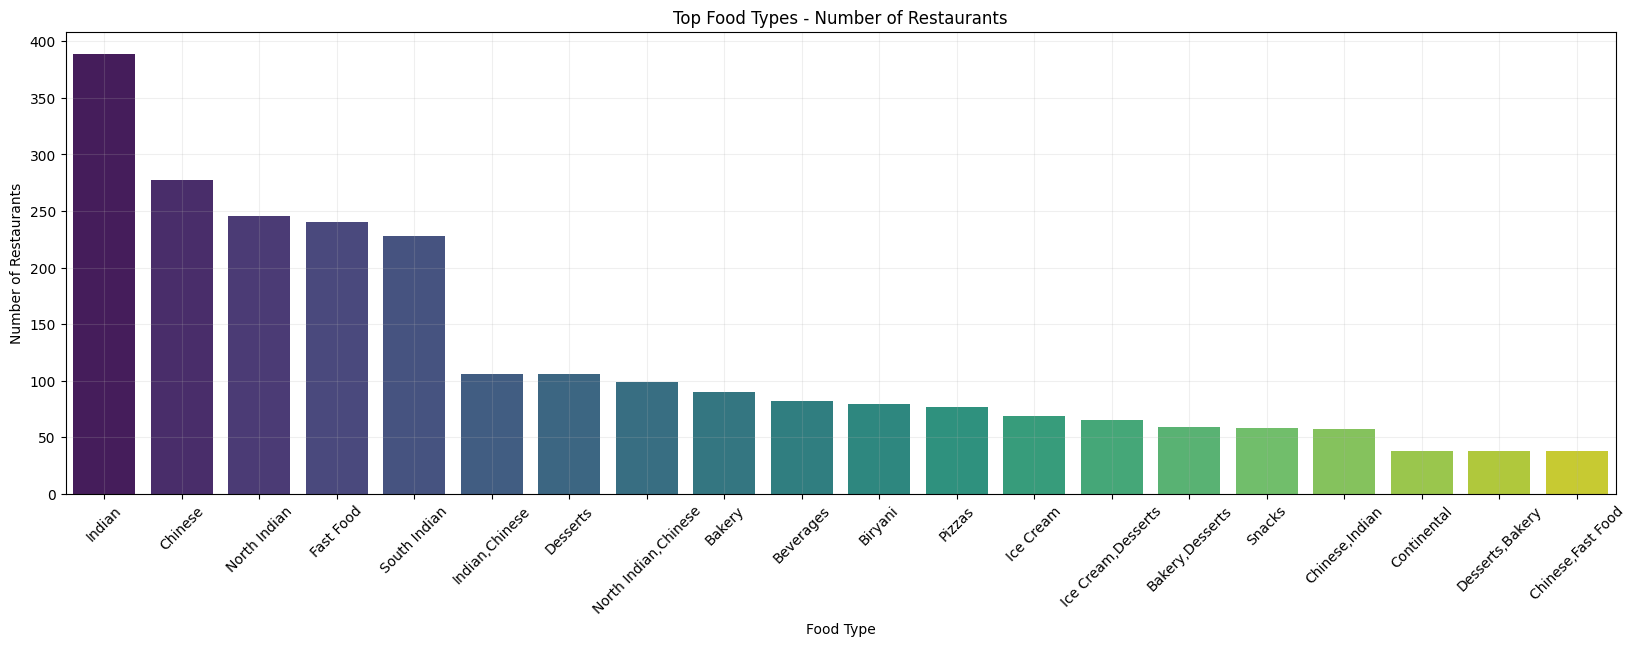

In [ ]:
food_type_counts = df['food_type'].value_counts().head(20) 

# Plotting the bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x=food_type_counts.index, y=food_type_counts.values, palette="viridis")
plt.xticks(rotation=45) 
plt.title("Top Food Types - Number of Restaurants")
plt.xlabel("Food Type")
plt.ylabel("Number of Restaurants")
plt.grid(alpha=0.2)
plt.show()

##### **Insights from the Bar Chart (Top Food Types - Number of Restaurants):**

1. **Most Popular Food Types:**  
   - **Indian cuisine** is the most dominant, with the highest number of restaurants (~400).  
   - **Chinese cuisine** follows, showing its strong demand.  
   - **North Indian, Fast Food, and South Indian** cuisines also have a significant presence, indicating their popularity.

2. **Diversity in Food Offerings:**  
   - The chart highlights a **wide variety of food types**, including **Desserts, Bakery, Beverages, Pizzas, and Biryani**.  
   - There is a mix of both **traditional and modern** food types.

3. **Fusion & Combo Cuisines:**  
   - Some restaurants serve a **combination of cuisines**, such as **Indian-Chinese, North Indian-Chinese, and Bakery-Desserts**.  
   - This suggests a trend where restaurants offer **multi-cuisine** options to attract a wider customer base.

4. **Lesser Common Food Types:**  
   - **Continental, Chinese-Fast Food, and Desserts-Bakery** have relatively fewer restaurants, indicating a niche market.  
   - While they have a smaller share, they cater to a specific customer segment.

##### **Conclusion:**  
The Swiggy dataset reveals that **Indian, Chinese, and Fast Food** are the most widely available cuisines. Meanwhile, **desserts and bakery items** also have a notable presence, catering to snack and sweet lovers. The presence of **fusion food types** indicates an evolving food market where restaurants are adapting to diverse customer preferences. 🚀

### 13. City-wise Avg Ratings – Plot a bar chart showing the average rating of restaurants in each city.

C:\Users\DAKSH\AppData\Local\Temp\ipykernel_2568\2156206695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rest_avg_rating.index, y=rest_avg_rating.values, palette="coolwarm")


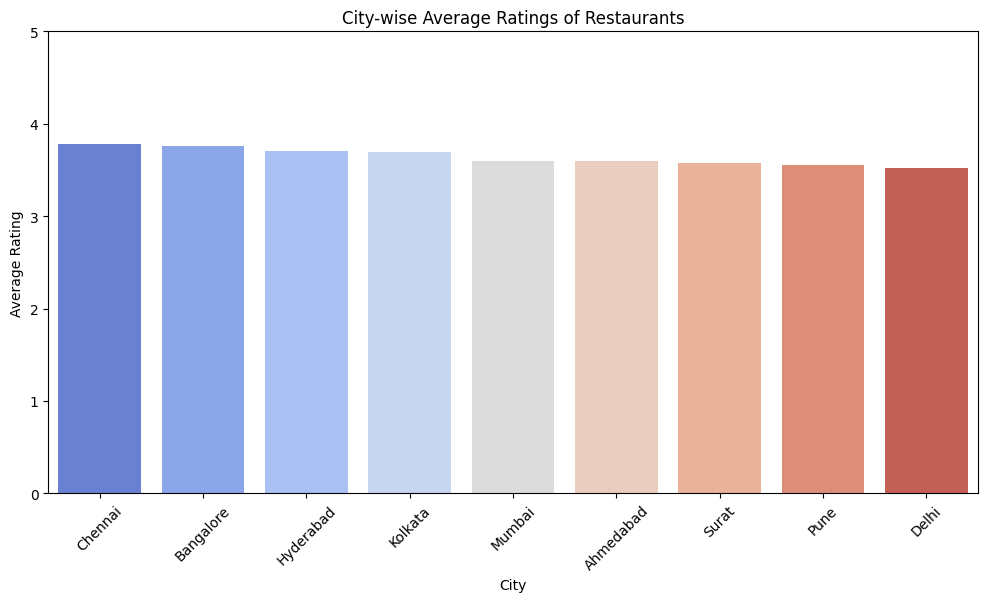

In [ ]:
rest_avg_rating= df.groupby("city")["avg_ratings"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=rest_avg_rating.index, y=rest_avg_rating.values, palette="coolwarm")
plt.xticks(rotation=45)  
plt.title("City-wise Average Ratings of Restaurants")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.ylim(0, 5)  
plt.show()

##### **Insights from the City-wise Average Ratings of Restaurants Chart:**

1. **Consistent Ratings Across Cities**  
   - The average ratings across all cities appear to be within a narrow range (~3.5 to ~3.8).  
   - This suggests that restaurant quality and customer satisfaction levels are fairly consistent across different locations.

2. **Top-Rated Cities**  
   - **Chennai, Bangalore, and Hyderabad** have the highest average ratings, indicating a relatively better dining experience.  
   - These cities might have a better food culture, quality of service, or customer satisfaction.

3. **Lower-Rated Cities**  
   - **Delhi, Pune, and Surat** have slightly lower average ratings compared to other cities.  
   - This could be due to higher competition, diverse restaurant quality, or different customer expectations.

4. **Possible Reasons for Rating Variations**  
   - **Bigger cities like Delhi and Mumbai** may have a wider variety of restaurants, including lower-rated ones, which bring down the average.  
   - Cities with **higher-rated restaurants may have more premium eateries, better food hygiene, or higher customer service standards**.

##### **Conclusion:**  
The average restaurant ratings are fairly stable across cities, with **Chennai and Bangalore leading** in customer satisfaction. However, cities like **Delhi and Pune** may have more room for improvement in terms of food quality and service. 🚀

### 14. Top 10 Cities with the Most Restaurants   - A bar chart showing the number of restaurants per city.

C:\Users\DAKSH\AppData\Local\Temp\ipykernel_2568\1159140309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_rest_city.index,y=most_rest_city.values,palette="magma")


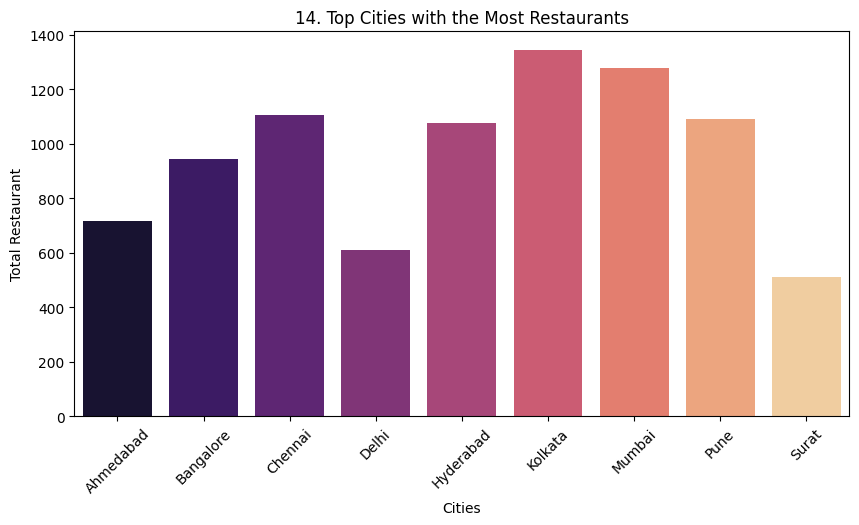

In [ ]:
most_rest_city=df.groupby("city")["restaurant"].count()

plt.figure(figsize=(10,5))
sns.barplot(x=most_rest_city.index,y=most_rest_city.values,palette="magma")
plt.title("14. Top Cities with the Most Restaurants")
plt.xticks(rotation=45)
plt.xlabel("Cities")
plt.ylabel("Total Restaurant")
plt.show()

##### **Insights from the Bar Chart - Top Cities with the Most Restaurants**  

1. **Kolkata Leads** 📈  
   - Kolkata has the highest number of restaurants, making it the most restaurant-dense city among the listed ones.  
   - This could be due to the city's diverse food culture and high demand for dining options.  

2. **Mumbai & Chennai Follow Closely** 🍽️  
   - Mumbai and Chennai also have a significant number of restaurants, slightly lower than Kolkata.  
   - These cities are known for their bustling food scenes, with a mix of traditional and modern cuisine options.  

3. **Hyderabad & Pune Have Strong Representation** 🌆  
   - Hyderabad and Pune have a competitive number of restaurants, indicating a growing food culture.  
   - Hyderabad, famous for its Biryani, and Pune, known for its vibrant cafe culture, contribute to their high restaurant count.  

4. **Bangalore & Ahmedabad in the Mid-Range** 🏙️  
   - Bangalore has a decent number of restaurants, likely driven by its tech industry and diverse population.  
   - Ahmedabad, though a smaller market compared to Mumbai or Kolkata, still maintains a strong restaurant presence.  

5. **Delhi Has Fewer Restaurants than Expected** ❓  
   - Surprisingly, Delhi has fewer restaurants than many other cities despite being a major food hub in India.  
   - This might be due to a larger number of street food vendors not categorized under restaurants.  

6. **Surat Has the Lowest Number of Restaurants** 📉  
   - Surat has the fewest restaurants among the listed cities, possibly due to a preference for home-cooked food and a less competitive restaurant industry.  

### 15. City-wise Average Price : - A grouped bar chart showing the average Price for restaurants in each city. 

C:\Users\DAKSH\AppData\Local\Temp\ipykernel_2568\2800883514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_price.index,y=city_avg_price.values,palette="cubehelix")


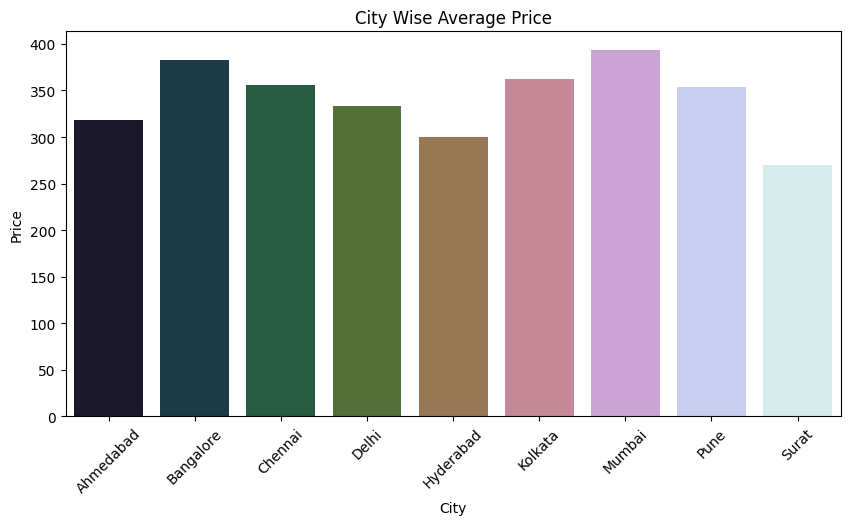

In [ ]:
city_avg_price=df.groupby("city")["price"].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=city_avg_price.index,y=city_avg_price.values,palette="cubehelix")
plt.title("City Wise Average Price")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.show()

#### Insights from the City-wise Average Price Chart:
1. **Mumbai has the highest average price**, indicating that dining out in Mumbai is relatively expensive.
2. **Bangalore and Kolkata also have high average prices**, which could be due to higher demand and living costs.
3. **Surat has the lowest average restaurant price**, making it the most affordable city for dining.
4. **Hyderabad and Ahmedabad fall on the lower end of the price spectrum**, suggesting budget-friendly dining options.
5. **Chennai, Delhi, and Pune have moderate prices**, neither too high nor too low.



### 16. Top 10 Most Expensive Restaurants  - A horizontal bar chart showing the top 10 most expensive restaurants.

                                restaurant  price
3079            Malgudi - The Savera Hotel   2500
2934           Itc Windsor - Gourmet Couch   2500
4718  Origami Japanese & Korean Restaurant   2500
1377                    Cafe Delhi Heights   2000
8485     Lubov Patisserie By Frozen Bottle   2000
2782                           Conrad Pune   2000
2757                              Yauatcha   2000
2352                              Pukhtaan   1900
800              Chin Chin - The Residency   1900
5810                     Sante Spa Cuisine   1900


C:\Users\DAKSH\AppData\Local\Temp\ipykernel_2568\2787474600.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='restaurant', data=most_expensive_rest, palette='magma')


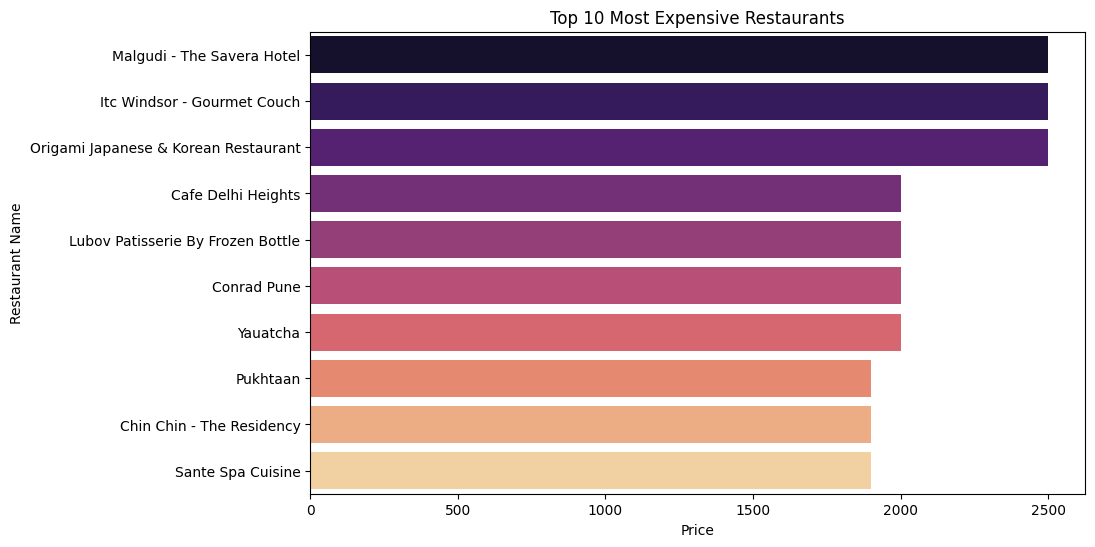

In [91]:
most_expensive_rest=df[["restaurant","price"]].sort_values(by="price",ascending=False).head(10)
print(most_expensive_rest)

plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='restaurant', data=most_expensive_rest, palette='magma')
plt.xlabel("Price")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Most Expensive Restaurants")
plt.show()

##### **Insights from the Top 10 Most Expensive Restaurants Chart**
1. **Malgudi - The Savera Hotel** is the most expensive restaurant, with a price nearing **₹2500**.
2. **ITC Windsor - Gourmet Couch** and **Origami Japanese & Korean Restaurant** also fall in the high-end category, with prices above **₹2000**.
3. **Cafe Delhi Heights** shows a noticeable drop in price compared to the top three but remains in the premium segment.
4. The **price difference between the top and bottom of the list** is significant, with **Sante Spa Cuisine** still being relatively costly but lower than the top-tier restaurants.
5. Restaurants offering **international cuisine or luxury dining experiences** (like Japanese and gourmet hotels) tend to be the most expensive.
6. Cities like **Delhi, Pune, and Bangalore** have multiple entries in the list, indicating a trend of high-end dining options in these locations.
